In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('data/Ads_CTR_Optimisation.csv')
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
import random
import math

In [9]:
N = 10000
d = 10
ads_selected = []
num_of_selected = [0] * d
sum_of_rwd = [0] * d
total_rwd = 0
for i in range(0, N):
    ad = 0
    max_upper_bound = 0
    for j in range(0, d):
        if num_of_selected[j] > 0:
            avg_rwd = sum_of_rwd[j] / num_of_selected[j]
            delta_i = math.sqrt(3/2 * math.log(i + 1) / num_of_selected[j])
            upper_bound = avg_rwd + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j
    ads_selected.append(ad)
    num_of_selected[ad] = num_of_selected[ad] + 1
    rwd = ds.values[i, ad]
    sum_of_rwd[ad] = sum_of_rwd[ad] + rwd
    total_rwd = total_rwd + rwd

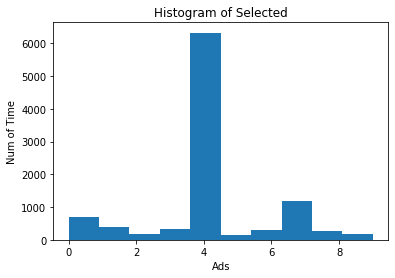

In [10]:
plt.hist(ads_selected)
plt.title("Histogram of Selected")
plt.xlabel("Ads")
plt.ylabel("Num of Time")
plt.show()